<hr/>

#Data Mining [EN.550.436]
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 2** - Sept 1, 2015

<hr/>


<h1><font color="darkblue">Descriptive Statistics</font></h1>

### Data Sets

- For example, a set of $N$ scalar measurements 

> $\displaystyle \big\{x_i\big\}_{i=1}^N$

### How to characterize the data?
- Location
- Dispersion
- Shape?

### IPython Notebook
- Interactive data analysis made easy
- And here is how you do it:

In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
N = 100;
x = np.random.randn(N);

In [3]:
# indexing from 0
print "%f, %f, ..., %f" % (x[0], x[1], x[N-1]) 
# last element
print "%f = %f" % (x[N-1], x[-1])

-0.441104, -0.088182, ..., 1.270186
1.270186 = 1.270186


In [4]:
# index out of bounds
for i in range(N-3,N+1):
    print "%d : \t %r" % (i, x[i])

97 : 	 -0.3898048099620911
98 : 	 -0.15756272958256473
99 : 	 1.2701862858885296


IndexError: index 100 is out of bounds for axis 0 with size 100

In [5]:
# error handling with exceptions
for i in range(N-3,N+1):
    try: 
        print "%d : \t %r" % (i, x[i])
    except IndexError as err: 
        print err

97 : 	 -0.3898048099620911
98 : 	 -0.15756272958256473
99 : 	 1.2701862858885296
index 100 is out of bounds for axis 0 with size 100


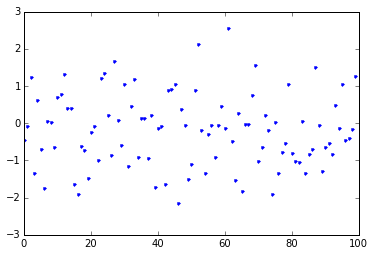

In [6]:
plot(x,'.');

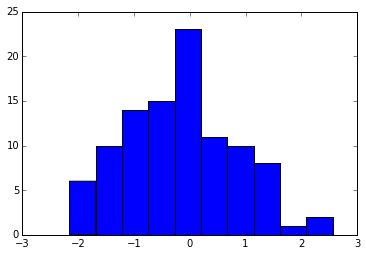

In [7]:
hist(x,10);

###Location
- Mode 
    - where it peaks
    - unimodal vs multimodal

- Sample average

> $\displaystyle \bar{x} = \frac{1}{N} \sum_{i=1}^N x_i$

> but indexing starts with 0 in Python and most computer languages

> $\displaystyle \bar{x} = \frac{1}{N} \sum_{i=0}^{N-1} x_i$

- Median

> The number that separates the higher half of the set from the lower half


In [8]:
avg = np.sum(x) / N 
print "%r = %r" % (avg, np.mean(x))

-0.17840109384629613 = -0.17840109384629613


In [9]:
med = np.median(x)
print med

-0.139746121636


(-30, 20)

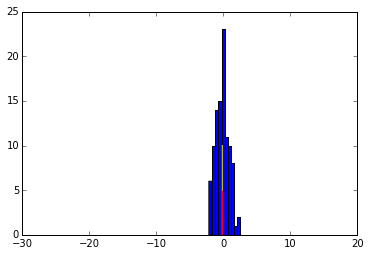

In [10]:
fig = figure() # (figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.hist(x,10)
ax.arrow(avg,0,0,5,color='r')
ax.arrow(med,5,0,5,color='y')
ax.set_xlim(-30, 20)

### Dispersion
- Sample variance

> $\displaystyle s^2 = \frac{1}{N\!-\!1} \sum_{i=1}^N \left(x_i - \bar{x}\right)^2$

- Standard deviation

> $\displaystyle s = \sqrt{s^2}$

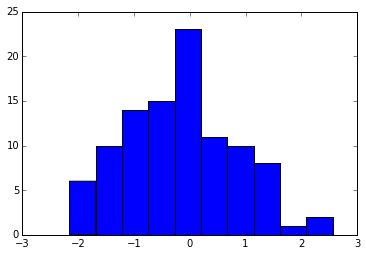

In [11]:
hist(x,10);

### Outliers
- What if just one element is too large, e.g., erroneously becomes $+\infty$
- Sample average $\bar{x} \rightarrow +\infty$
- Sample variance explodes, too

    **Ouch !!**


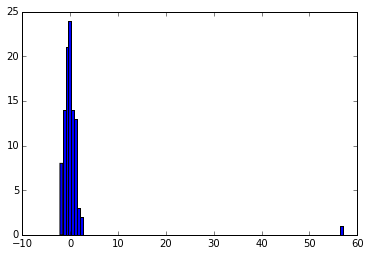

In [12]:
x[0] = 57
hist(x,100);

### Robustness
- Robust against outliers? What fraction can we tolerate?
- Median is more robust than the mean
- Median Absolute Deviation (MAD) for dispersion

In [13]:
x[0] = 1e9
print 'Average old vs new:', avg, mean(x)
print 'Median  old vs new:', med, median(x)

Average old vs new: -0.178401093846 9999999.82601
Median  old vs new: -0.139746121636 -0.128859014879


### Probability Density Function
- PDF a.k.a. Probability Distribution Density Function
- Probabiliy of $x$ between $a$ and $b$ for any $(a,b)$ is

> $\displaystyle P_{ab} = \int_a^b p(x)\,dx$

- Always 

> $\displaystyle  \int_{-\infty}^{\infty} p(x)\,dx = 1$


- Example 1: uniform distribution on $(a,b)$

> $\displaystyle  U(x;a,b) = \frac{\mathbb{1}_{ab}(x)}{b\!-\!a} $

- Example 2: Gaussian or normal distribution

> $\displaystyle  G(x;\mu,\sigma) = \frac{\pmb{1}}{\sqrt{2\pi\sigma^2}}\ \exp\left[{-\frac{(x\!-\!\mu)^2}{\sigma^2} }\right]$

- Example 3: Log-normal

### Gauss on Money!

<!--
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/DEU-10m-anv.jpg/640px-DEU-10m-anv.jpg' width=400>
-->
<img src='files/640px-DEU-10m-anv.jpg' width=400 align=left>

- Even the formula

<img src='files/10DM.jpg' width=400 align=left>

### Cummulative Distribution Function
- Integral up to given $x$: prob of being less than $x$

> $\displaystyle \mathrm{CDF}(x) = \int_{-\infty}^{x} p(t)\,dt$

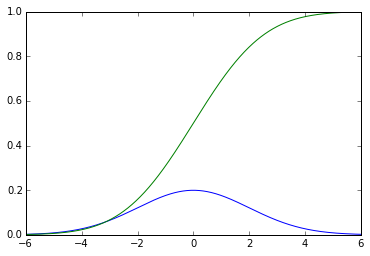

In [14]:
from scipy.stats import norm as gaussian
x = np.linspace(-6,6,1000) 
mu, sig = 0, 2
plot(x, gaussian.pdf(x,mu,sig));
plot(x, gaussian.cdf(x,mu,sig));

In [15]:
from scipy.stats import lognorm
plot(x, norm.pdf(x,0,sig));
plot(x, lognorm.pdf(x,sig), color='r');

AttributeError: 'function' object has no attribute 'pdf'

### Characterization of PDFs

- Expectation value of $x$

> $\displaystyle \mu = \mathbb{E}[x] = \int_{-\infty}^{\infty}\! x\ p(x)dx$

- Expectation value of any $f(x)$

> $\displaystyle \mathbb{E}[f(x)] = \int_{-\infty}^{\infty}\! f(x)\ p(x)dx$

- Moments 

> $\displaystyle \mathbb{E}[x^k]$
    
- Central moments 

> $\displaystyle \mathbb{E}\big[(x\!-\!\mu)^k\big]$

- Variance

> $\displaystyle \mathbb{Var}[x] = \mathbb{E}\big[(x\!-\!\mu)^2\big]$

- Standard deviation

> $\displaystyle \sigma = \sqrt{\mathbb{Var}[x]}$

- Normalized moments

> $\displaystyle \mathbb{E}\left[\left(\frac{x\!-\!\mu}{\sigma}\right)^k\right]$

- Skewness

> 3rd normalized moment ($k$=3)

- Kurtosis

> 4th normalized moment ($k$=4)
 


<img src="files/skew_kurt.png" width=400 align=left>

In [18]:
mean, var, skew, kurt = gaussian.stats(mu, sig, moments='mvsk');
print mu, sig, '->', mean, var, skew, kurt

0 2 -> 0.0 4.0 0.0 0.0


In [19]:
mean, var, skew, kurt = lognorm.stats(sig, moments='mvsk');
print sig, '->', mean, var, skew, kurt

2 -> 7.38905609893 2926.35983701 414.3593433 9220556.97731


### Sampling from distributions
- Uniformly using random numbers between 0 and 1
- Rejection sampling, e.g., circle sampling
- Inverse transform sampling

<!--
<img src="https://upload.wikimedia.org/wikipedia/en/6/66/Circle_sampling.png" alt="Circle sampling.png" height="200" width="200" align=left>
-->
<img src="files/Circle_sampling.png" alt="Circle sampling.png from wikimedia.org" height="200" width="200" align=left>

<img src="files/inv.png" height="400" width="400" align=left>